In [1]:
"""
This file was used to convert the original data to a better data format from the raw power plant data. It was only used once.
"""

'\nThis file was used to convert the original data to a better data format from the raw power plant data. It was only used once.\n'

In [2]:
import os
import h5py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
filet = h5py.File(r"C:\Users\Lucas\Data\Plant\Powerplant_Data.hdf5")
keys = list(filet.keys())

In [4]:
# sort the keys into the different blocks
blocks = set(key[:2] for key in keys)
block_dict = {block: [] for block in blocks}
[block_dict[key[:2]].append(key) for key in keys]
for key, listed in block_dict.items():
    print(f'For block {key}: {len(listed)} signals.')

For block @3: 407 signals.
For block @1: 407 signals.
For block @2: 408 signals.
For block @4: 408 signals.


In [5]:
filet[keys[0]].keys()

<KeysViewHDF5 ['ESST_1d', 'FLUSS_1d', 'Unnamed: 0', 'signal', 'was_filled']>

In [6]:
# check whether all sensors are the same
key = next(iter(filet))
cmp_steps = filet[key]['Unnamed: 0'][:]
for name, signal in tqdm(filet.items(), desc='Checking signal time steps'):
    assert np.array_equal(signal['Unnamed: 0'], cmp_steps), f'Signal {name} has different time steps.'

Checking signal time steps: 100%|██████████| 1630/1630 [00:02<00:00, 646.55it/s]


In [7]:
target = pd.to_datetime(filet[keys[0]]['Unnamed: 0'][:], unit='s')[-10_000:]

In [8]:
np.sum(filet[keys[0]]['was_filled'][-10_000:])

0

<Axes: xlabel='None'>

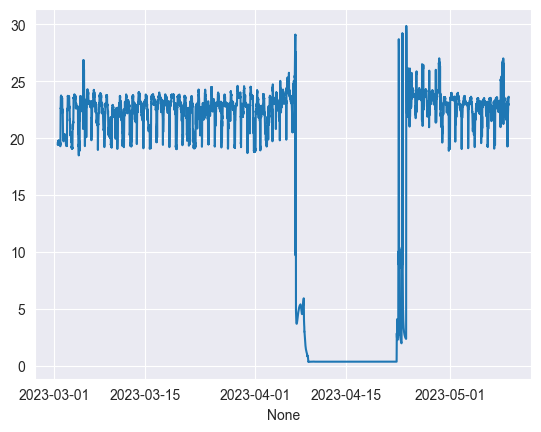

In [9]:
sns.lineplot(y=filet[keys[0]]['signal'][-10_000:], x=target)

In [10]:
power = [ele for ele in keys if 'CE901' in ele or 'CE003A' in ele][3:6]

In [11]:
data = {sensor: filet[sensor]['signal'][-10_000:] for sensor in power}

In [12]:
power_df = pd.DataFrame(data=data, index=filet[next(iter(data))]['Unnamed: 0'][-10_000:])
power_df.index

Index([1677680400, 1677681000, 1677681600, 1677682200, 1677682800, 1677683400,
       1677684000, 1677684600, 1677685200, 1677685800,
       ...
       1683674400, 1683675000, 1683675600, 1683676200, 1683676800, 1683677400,
       1683678000, 1683678600, 1683679200, 1683679800],
      dtype='int64', length=10000)

<Axes: >

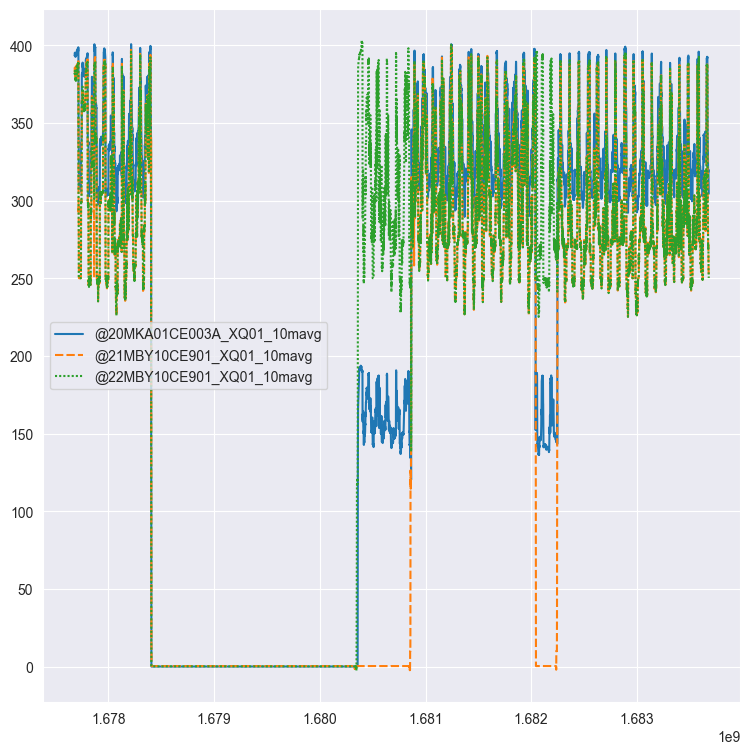

In [13]:
plt.figure(figsize=(9,9))
sns.lineplot(power_df)

In [14]:
# save all the data as parquet
for block in blocks:
    
    # make a directory to save the folder
    block_dir = os.path.join(r"C:\Users\Lucas\Data", f'Plant_{block}')
    os.mkdir(block_dir)
    
    # go through the signals and make folders with parquet files for every cluster
    for turbine in range(0,3):
        
        # make a folder for the turbine
        turbine_folder = os.path.join(block_dir, f'turbine-{turbine}')
        os.mkdir(turbine_folder)

In [15]:
# go through the signals and save them as parquet
for signal in tqdm(filet.keys(), desc='Saving Signals'):
    
    # get the corresponding folder
    dir_name = os.path.join(r"C:\Users\Lucas\Data", f'Plant_{signal[:2]}', f'turbine-{signal[2]}')
    
    # extract the corresponding dataframe
    curr_df = pd.DataFrame(data=filet[signal]['signal'][-10_000:], index=pd.to_datetime(filet[signal]['Unnamed: 0'][-10_000:], unit='s'), columns=['value'])
    curr_df.to_parquet(os.path.join(dir_name, f'{signal}.parquet'))

Saving Signals: 100%|██████████| 1630/1630 [00:09<00:00, 179.10it/s]
